<a href="https://www.kaggle.com/code/shanakk/price-prediction-of-cars?scriptVersionId=141513778" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-using-ml/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction-using-ml/Data Dictionary - carprices.xlsx


# ***Car Price prediction***

![](http://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/i/d96bb958-4e6c-4ce0-9447-fbe226fbbecf/df57q92-9de8653d-9e7c-4131-8298-a90134750aa5.jpg)


## Introduction:

* Car price prediction is a captivating field in machine learning, where factors like brand reputation, car attributes, and engine specifications impact vehicle prices. This project explores this realm, offering insights into how these variables influence prices and teaching machine learning techniques for predictive modeling. From data preprocessing to model evaluation, it guides you in creating a tool to estimate car prices, providing hands-on experience in deciphering pricing dynamics. Ideal for data enthusiasts and aspiring data scientists, this project showcases the power of data-driven insights in understanding car pricing intricacies.

## Objective:

* This project aims to build a car price prediction model using machine learning. Using a dataset with car information and prices, we'll preprocess the data, train a model, and evaluate its performance.

## Steps:
1.  Data loading and exploration to understand the dataset.
2.  Data preprocessing, including encoding categorical variables.
3. Splitting the dataset into training and testing sets.
4. Model selection, training, and evaluation using Linear Regression.
5. Prediction of car prices for a new set of features.

Let's begin by loading the necessary libraries and exploring the dataset.

## **Import Libraries and Load Dataset**

In [2]:
import pandas as pd
import numpy as np

#visualising modules
import seaborn as sns
import matplotlib.pyplot as plt

#Removing warnings from output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/car-price-prediction-using-ml/CarPrice_Assignment.csv")

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### **Explore the dataset**

In [5]:
#to display the first five rows of a DataFrame
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#to display the valuable information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# to retrieve the dimensions or shape of a DataFrame.
df.shape

(205, 26)

In [8]:
# summary of the basic statistical metrics for each numerical column in the DataFrame
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#calculates and displays the count of missing values in each column of the DataFrame
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# calculates the count of each unique value in the "fueltype" column of the DataFrame 
df["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [11]:
# calculates the count of each unique value in the "fueltype" column  and "CarName" column of the DataFrame 
df[["CarName","fueltype"]].value_counts()

CarName              fueltype
toyota corolla       gas         5
toyota corona        gas         5
subaru dl            gas         4
peugeot 504          gas         4
toyota mark ii       gas         3
                                ..
isuzu MU-X           gas         1
isuzu D-Max V-Cross  gas         1
honda prelude        gas         1
honda civic 1500 gl  gas         1
vw rabbit            gas         1
Length: 153, dtype: int64

In [12]:
#to select columns from the DataFrame df that have data type 'object' (categorical values)
categorical_columns = df.select_dtypes(include=['object'])
print(categorical_columns)

                      CarName fueltype aspiration doornumber      carbody  \
0          alfa-romero giulia      gas        std        two  convertible   
1         alfa-romero stelvio      gas        std        two  convertible   
2    alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                 audi 100 ls      gas        std       four        sedan   
4                  audi 100ls      gas        std       four        sedan   
..                        ...      ...        ...        ...          ...   
200           volvo 145e (sw)      gas        std       four        sedan   
201               volvo 144ea      gas      turbo       four        sedan   
202               volvo 244dl      gas        std       four        sedan   
203                 volvo 246   diesel      turbo       four        sedan   
204               volvo 264gl      gas      turbo       four        sedan   

    drivewheel enginelocation enginetype cylindernumber fuelsystem  
0     

## **Data Visualisation**

<Axes: >

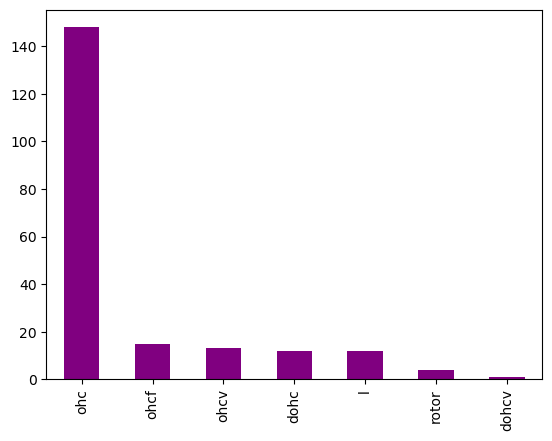

In [13]:
#Visualisation of each enginetype values
class_counts = df['enginetype'].value_counts()
class_counts.plot(kind='bar',color='Purple')

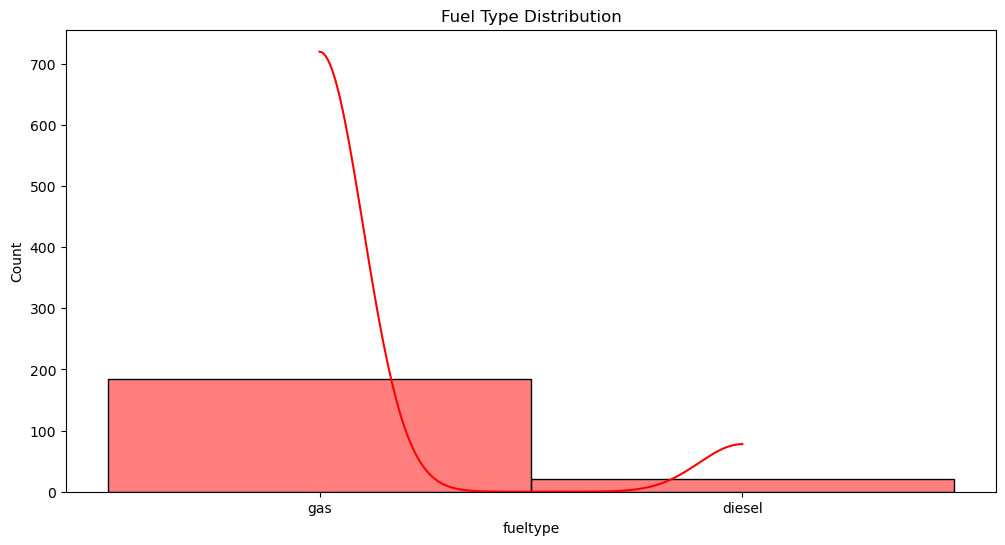

In [14]:
#Fuel Type distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="fueltype", bins=20, kde=True,color='Red')
plt.title("Fuel Type Distribution")
plt.show()

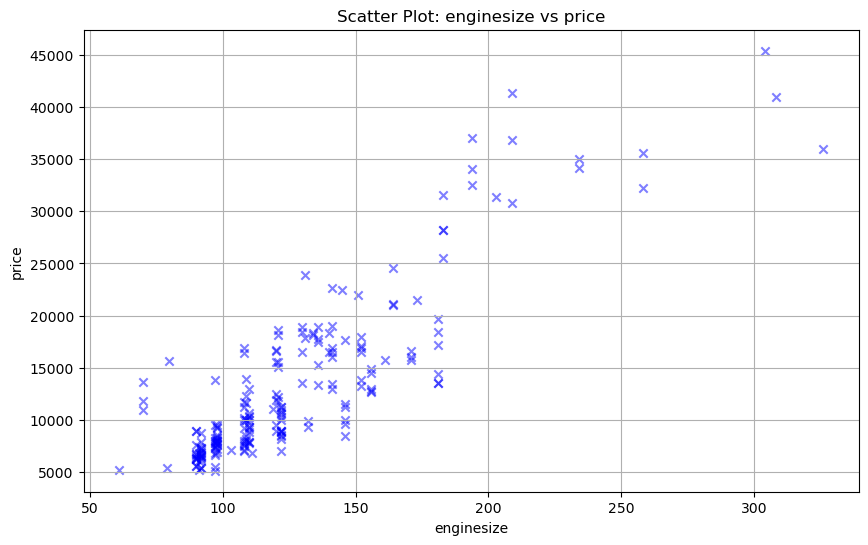

In [15]:
# Scatter plot:enginesize vs price

x_column = 'enginesize'
y_column = 'price'

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(df[x_column], df[y_column], marker='x', color='blue', alpha=0.5)  # 'o' for circle markers

plt.title(f'Scatter Plot: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

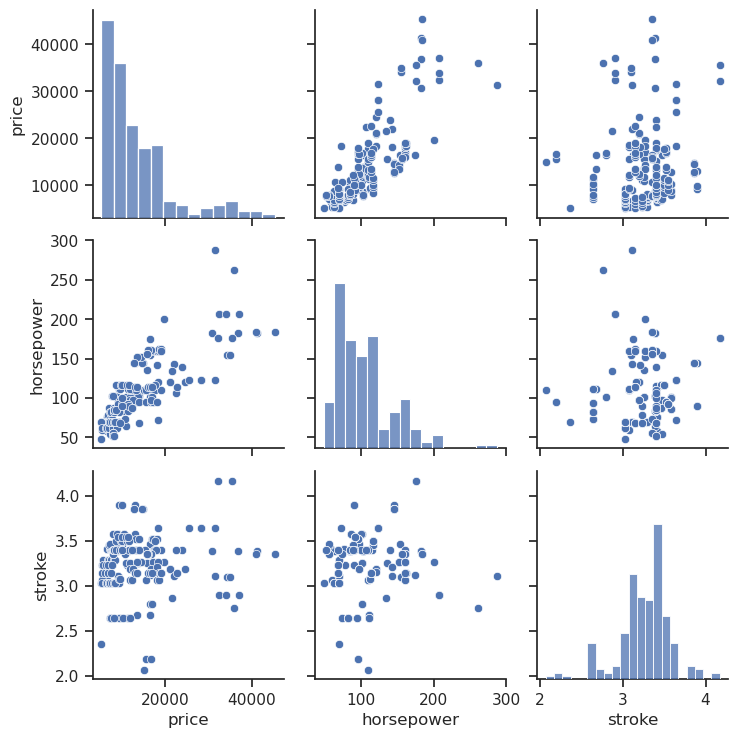

In [16]:
#Pairplot
sns.set(style="ticks")
sns.pairplot(df[['price','enginetype','horsepower','stroke']])
plt.show()

## **Data Preprocessing**

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns

for i in var_mod:
    df[i] = le.fit_transform(df[i])

## **Split data into Train and Test data**

In [18]:
from sklearn.model_selection import train_test_split
X=df.drop(['price'],axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

## **Model Selection And Training**

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## **Model Evaluation**

In [20]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squred Error:",mse)
print("R-squred:",r2)

Mean Squred Error: 11129482.89365855
R-squred: 0.8309499821316699


## **Predict New Car Price**

In [21]:
new_features=[456,-1,143,0,1,1,0,2,0,109.1,182.4,68.2,52.4,2952,3,2,141,5,3.58,3.40,9.5,114,5500,23,25]
new_car_price = model.predict([new_features])
print("Predicted Price:", new_car_price[0])

Predicted Price: 20974.70652050835
